# Unsupervised Learning

## Clustering

Used to group data when you do not have a label to predict (seeing how similar/different things are from one another) or you are not predicting a label, but rather "condensing" data down to a fewer number of features.

For example, lets say we have a bunch of points plotted on a graph in the pattern below. We notice that it can be grouped into 3 different groups. If we add the encircled dot, it would be classified as part of the cyan group, since it is so "similar"

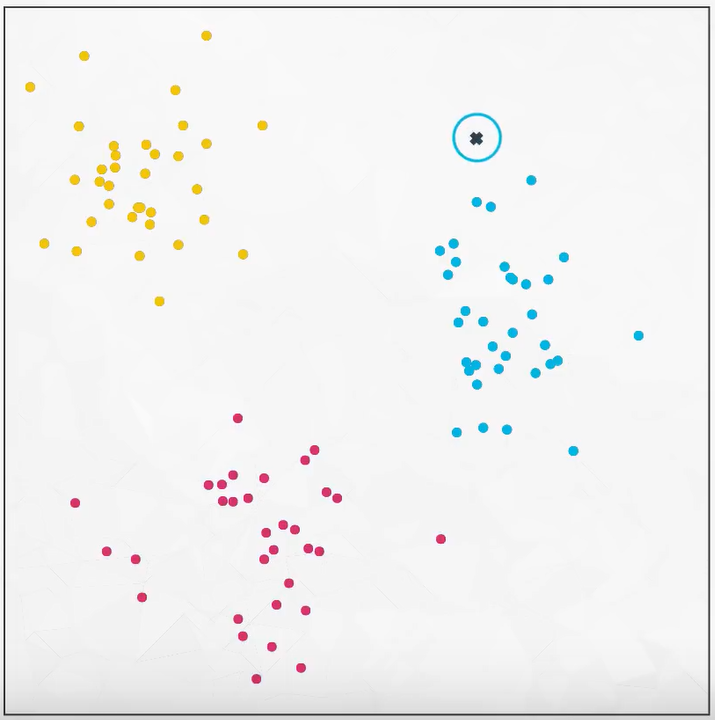

This is **clustering**, which is one of the types of unsup ML

### K-means algorithm

Used to cluster similar music, movies, books, etc. We can also cluster customers and such for generating recommendations.

"K" represents the number of clusters you have in the dataset.

For example, the graph below shows how far I travel and how awesome my day was. The first cluster is at work while the second is from visiting my mom.

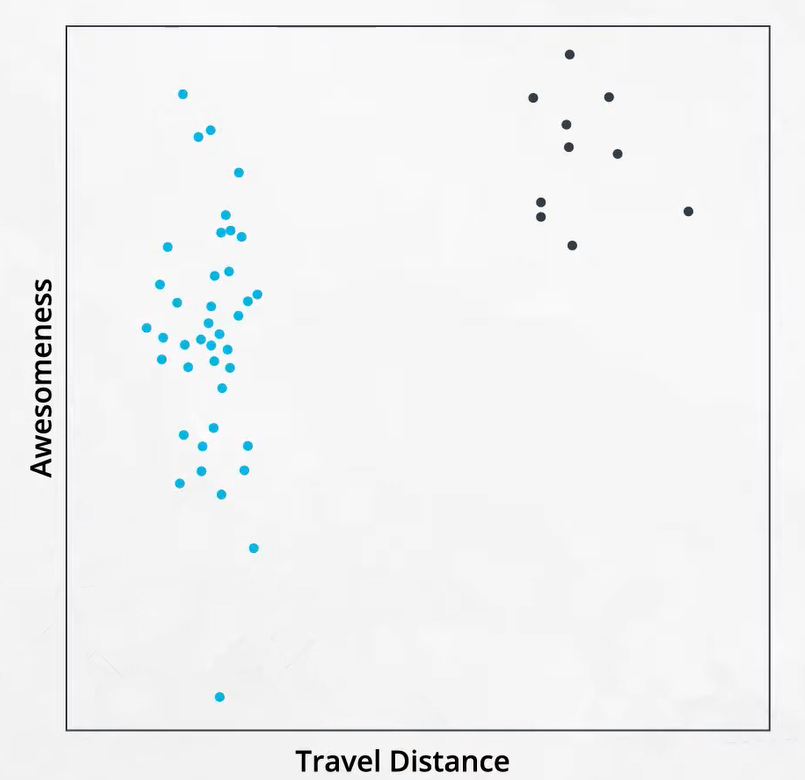

In this case, K is 2.

#### Changing/Choosing K

How many clusters you want to split your data into == K

Usually selected based on preconceived ideas about the topic.
- Example from Udacity - students using the material are either new to the skill, upskilling in their current career, or planning to make a change in career. This will be 3 clusters of students.

Some decision methods for choosing K are when you have no idea how many clusters the data has:
- Elbow method - kind of guess and check where you check an increasing number of clusters, taking the average distance of the points to the center of the cluster
  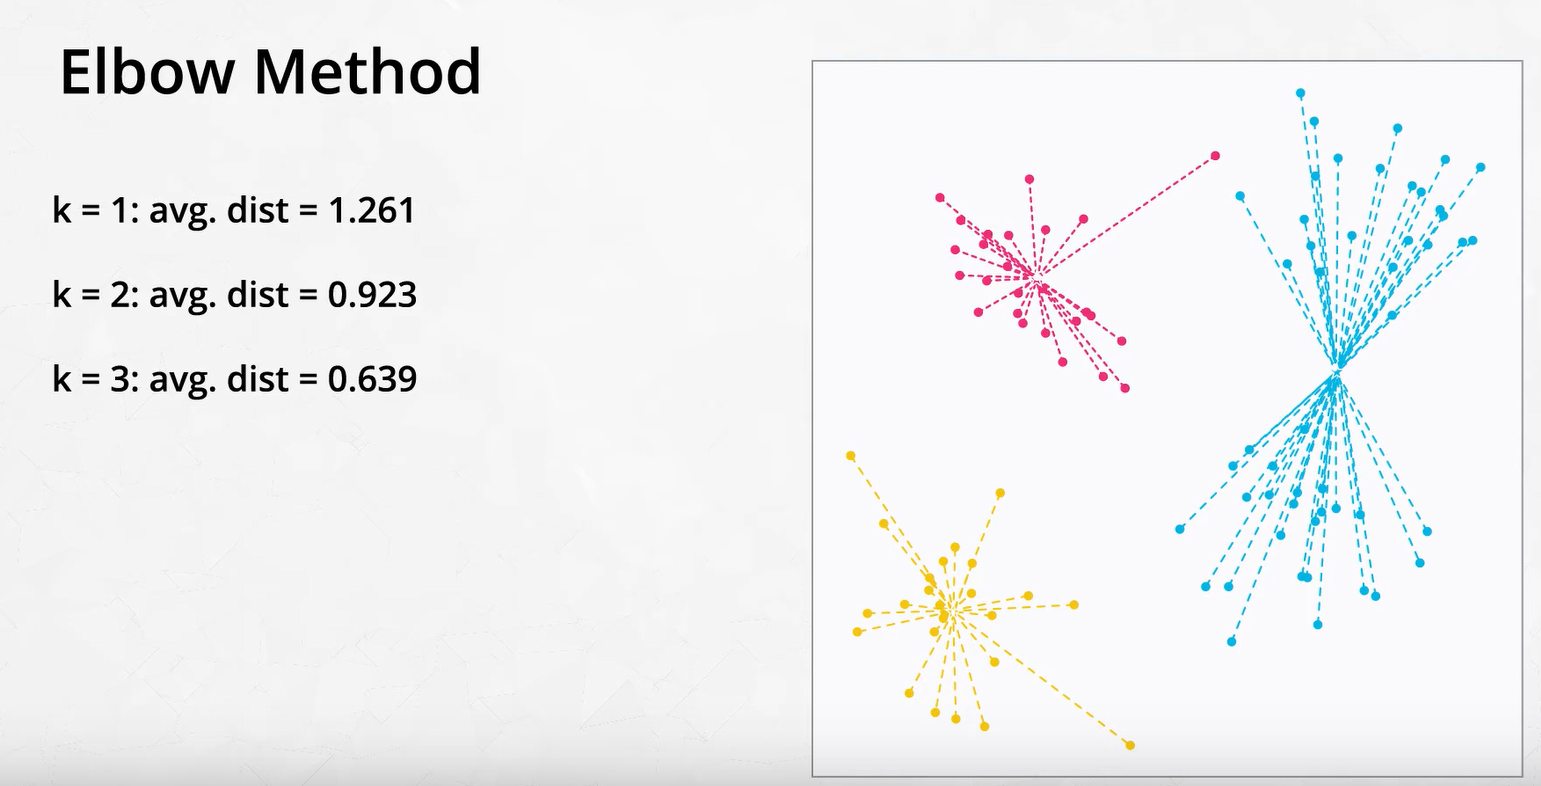
  - Plotting the results will graph a line like the one below
  
  - Now you take the elbow, or where it goes from sharp down to closer to the end.
  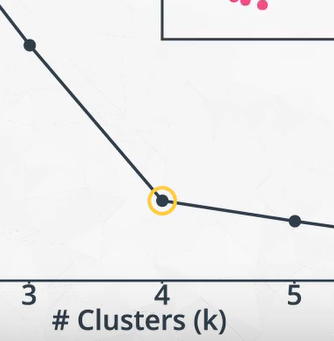
  - You want to get to a point where increasing K no longer significantly decreases the amount of light.

K will be the same number of centers/centroids in your model. This is a centroid (see image)

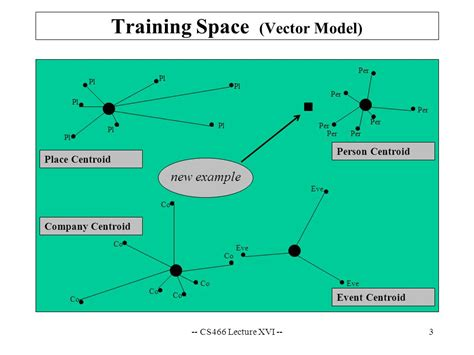

Once we have a dataset, the basic process for the K-means alg is (atleast when using `sklearn.cluster.KMeans`):
1. Instantiate the model (`km = KMeans(4)`)
2. Fit your model to the data (`model = km.fit(dataset)`)
3. Predict the labels for the data (`labels = model.predict(dataset)`)
4. Plot the data (example video shows `custom_helpers.plot_data(dataset, labels)`)

*Note: You can use `.predict_fit(dataset)` for doing steps 2 and 3 in one operation.*

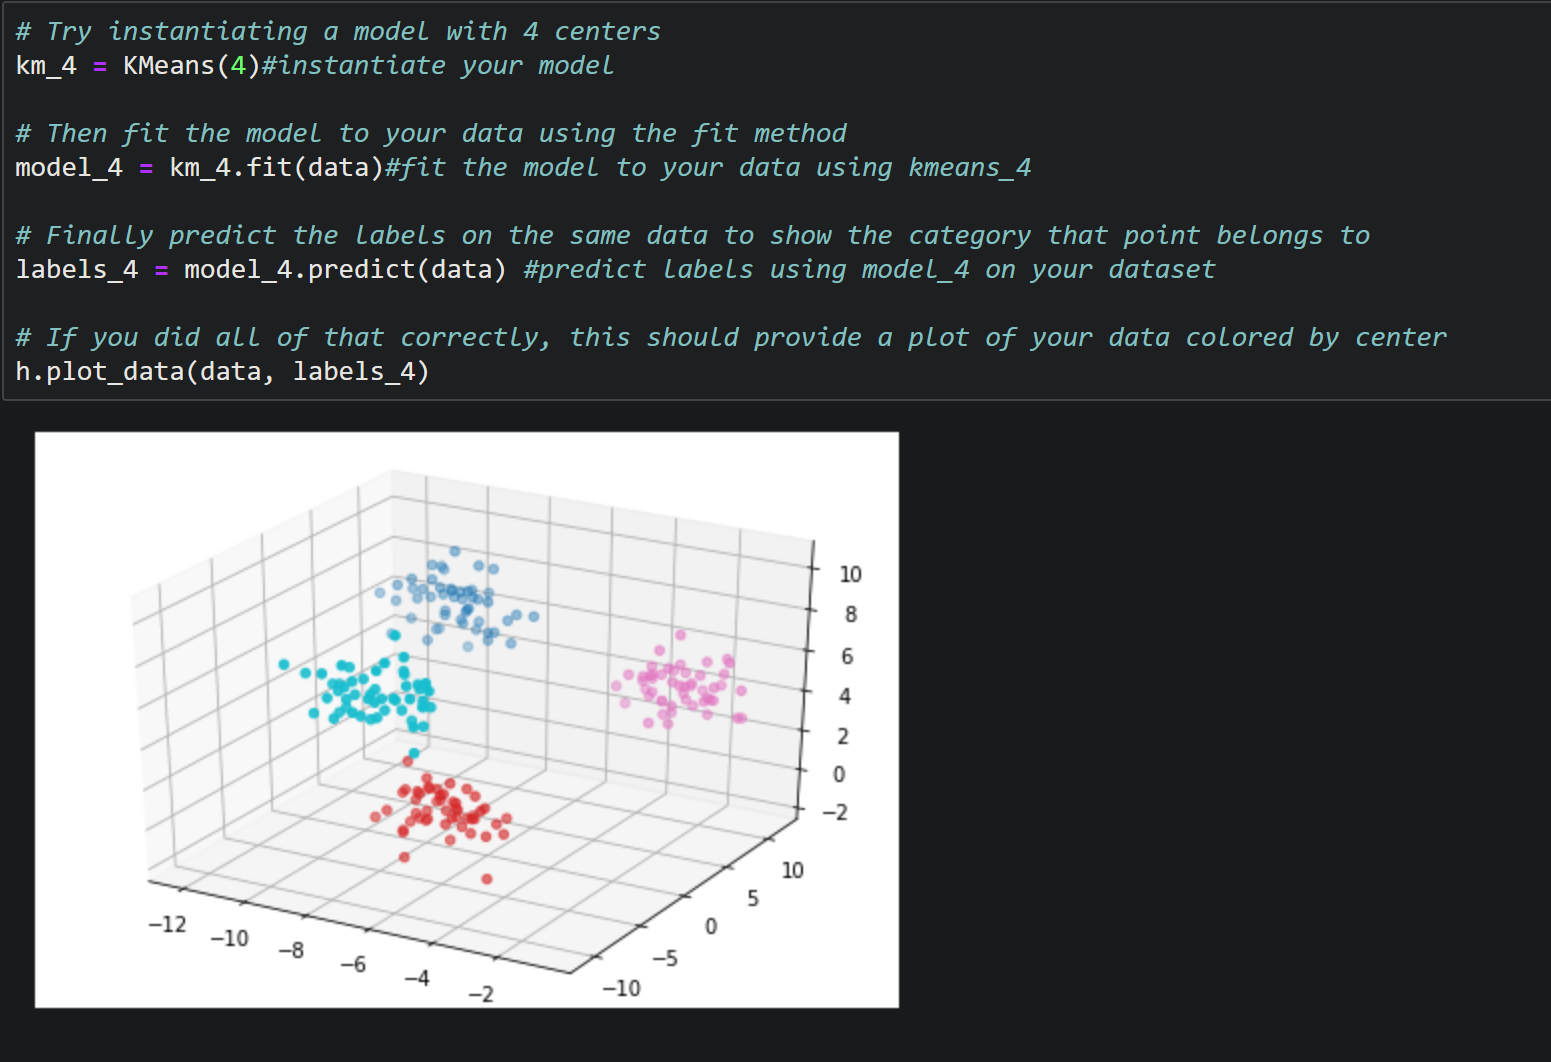

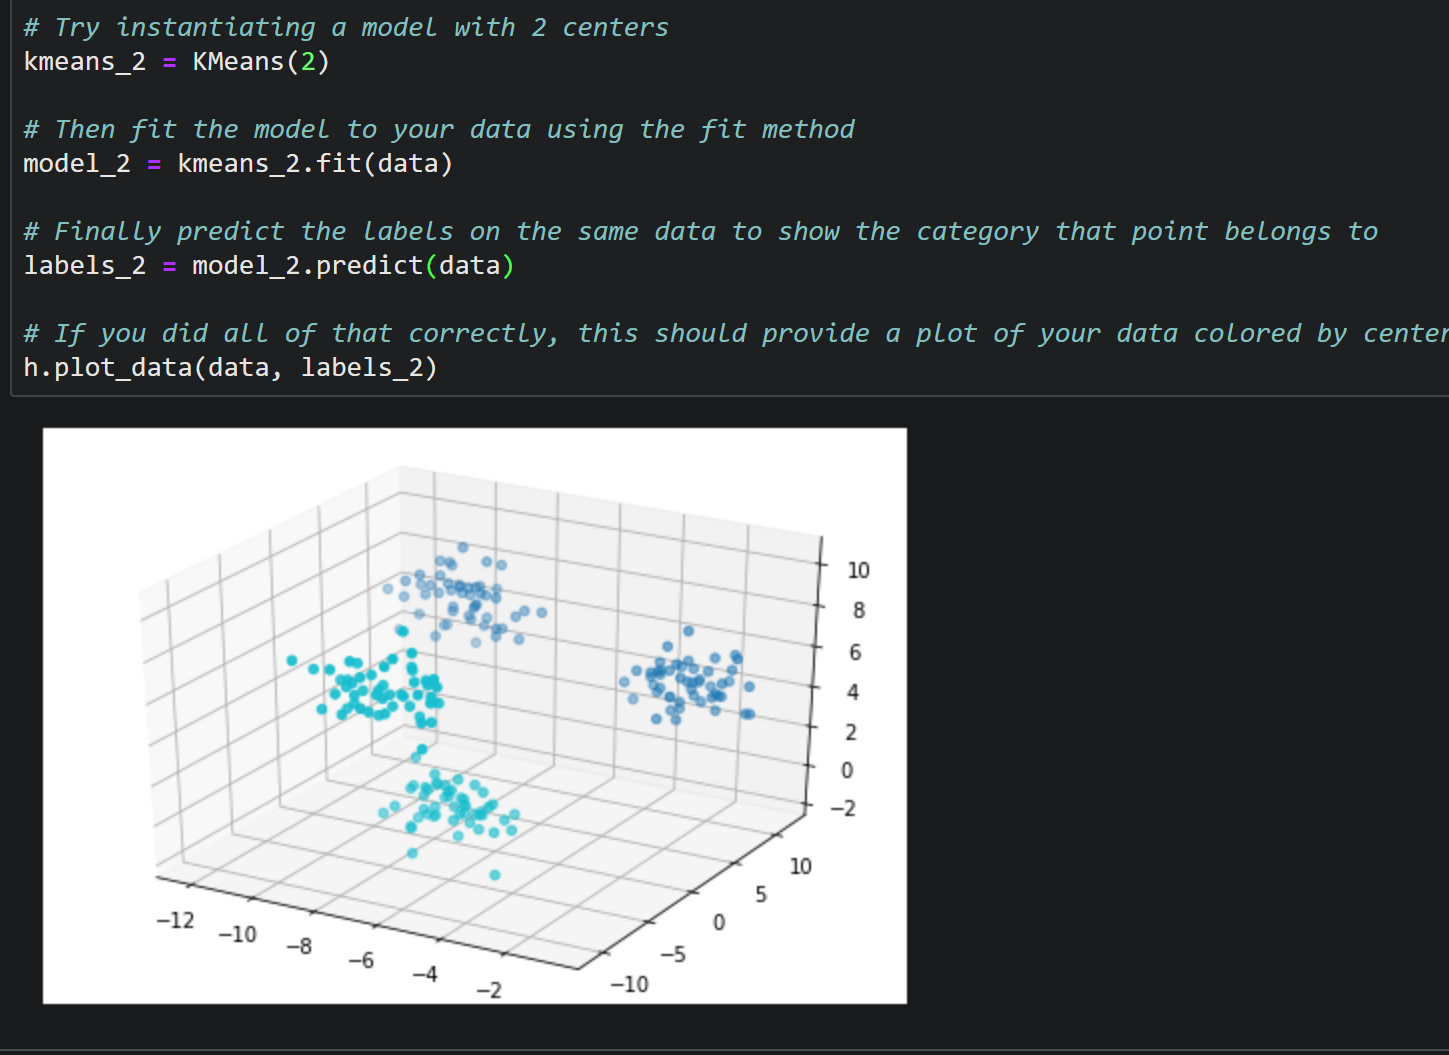



It's hard to tell what the best K value would be. One can imagine it would be 4 just based on the visualization, but we can also use some methods to **score** different K-vals.

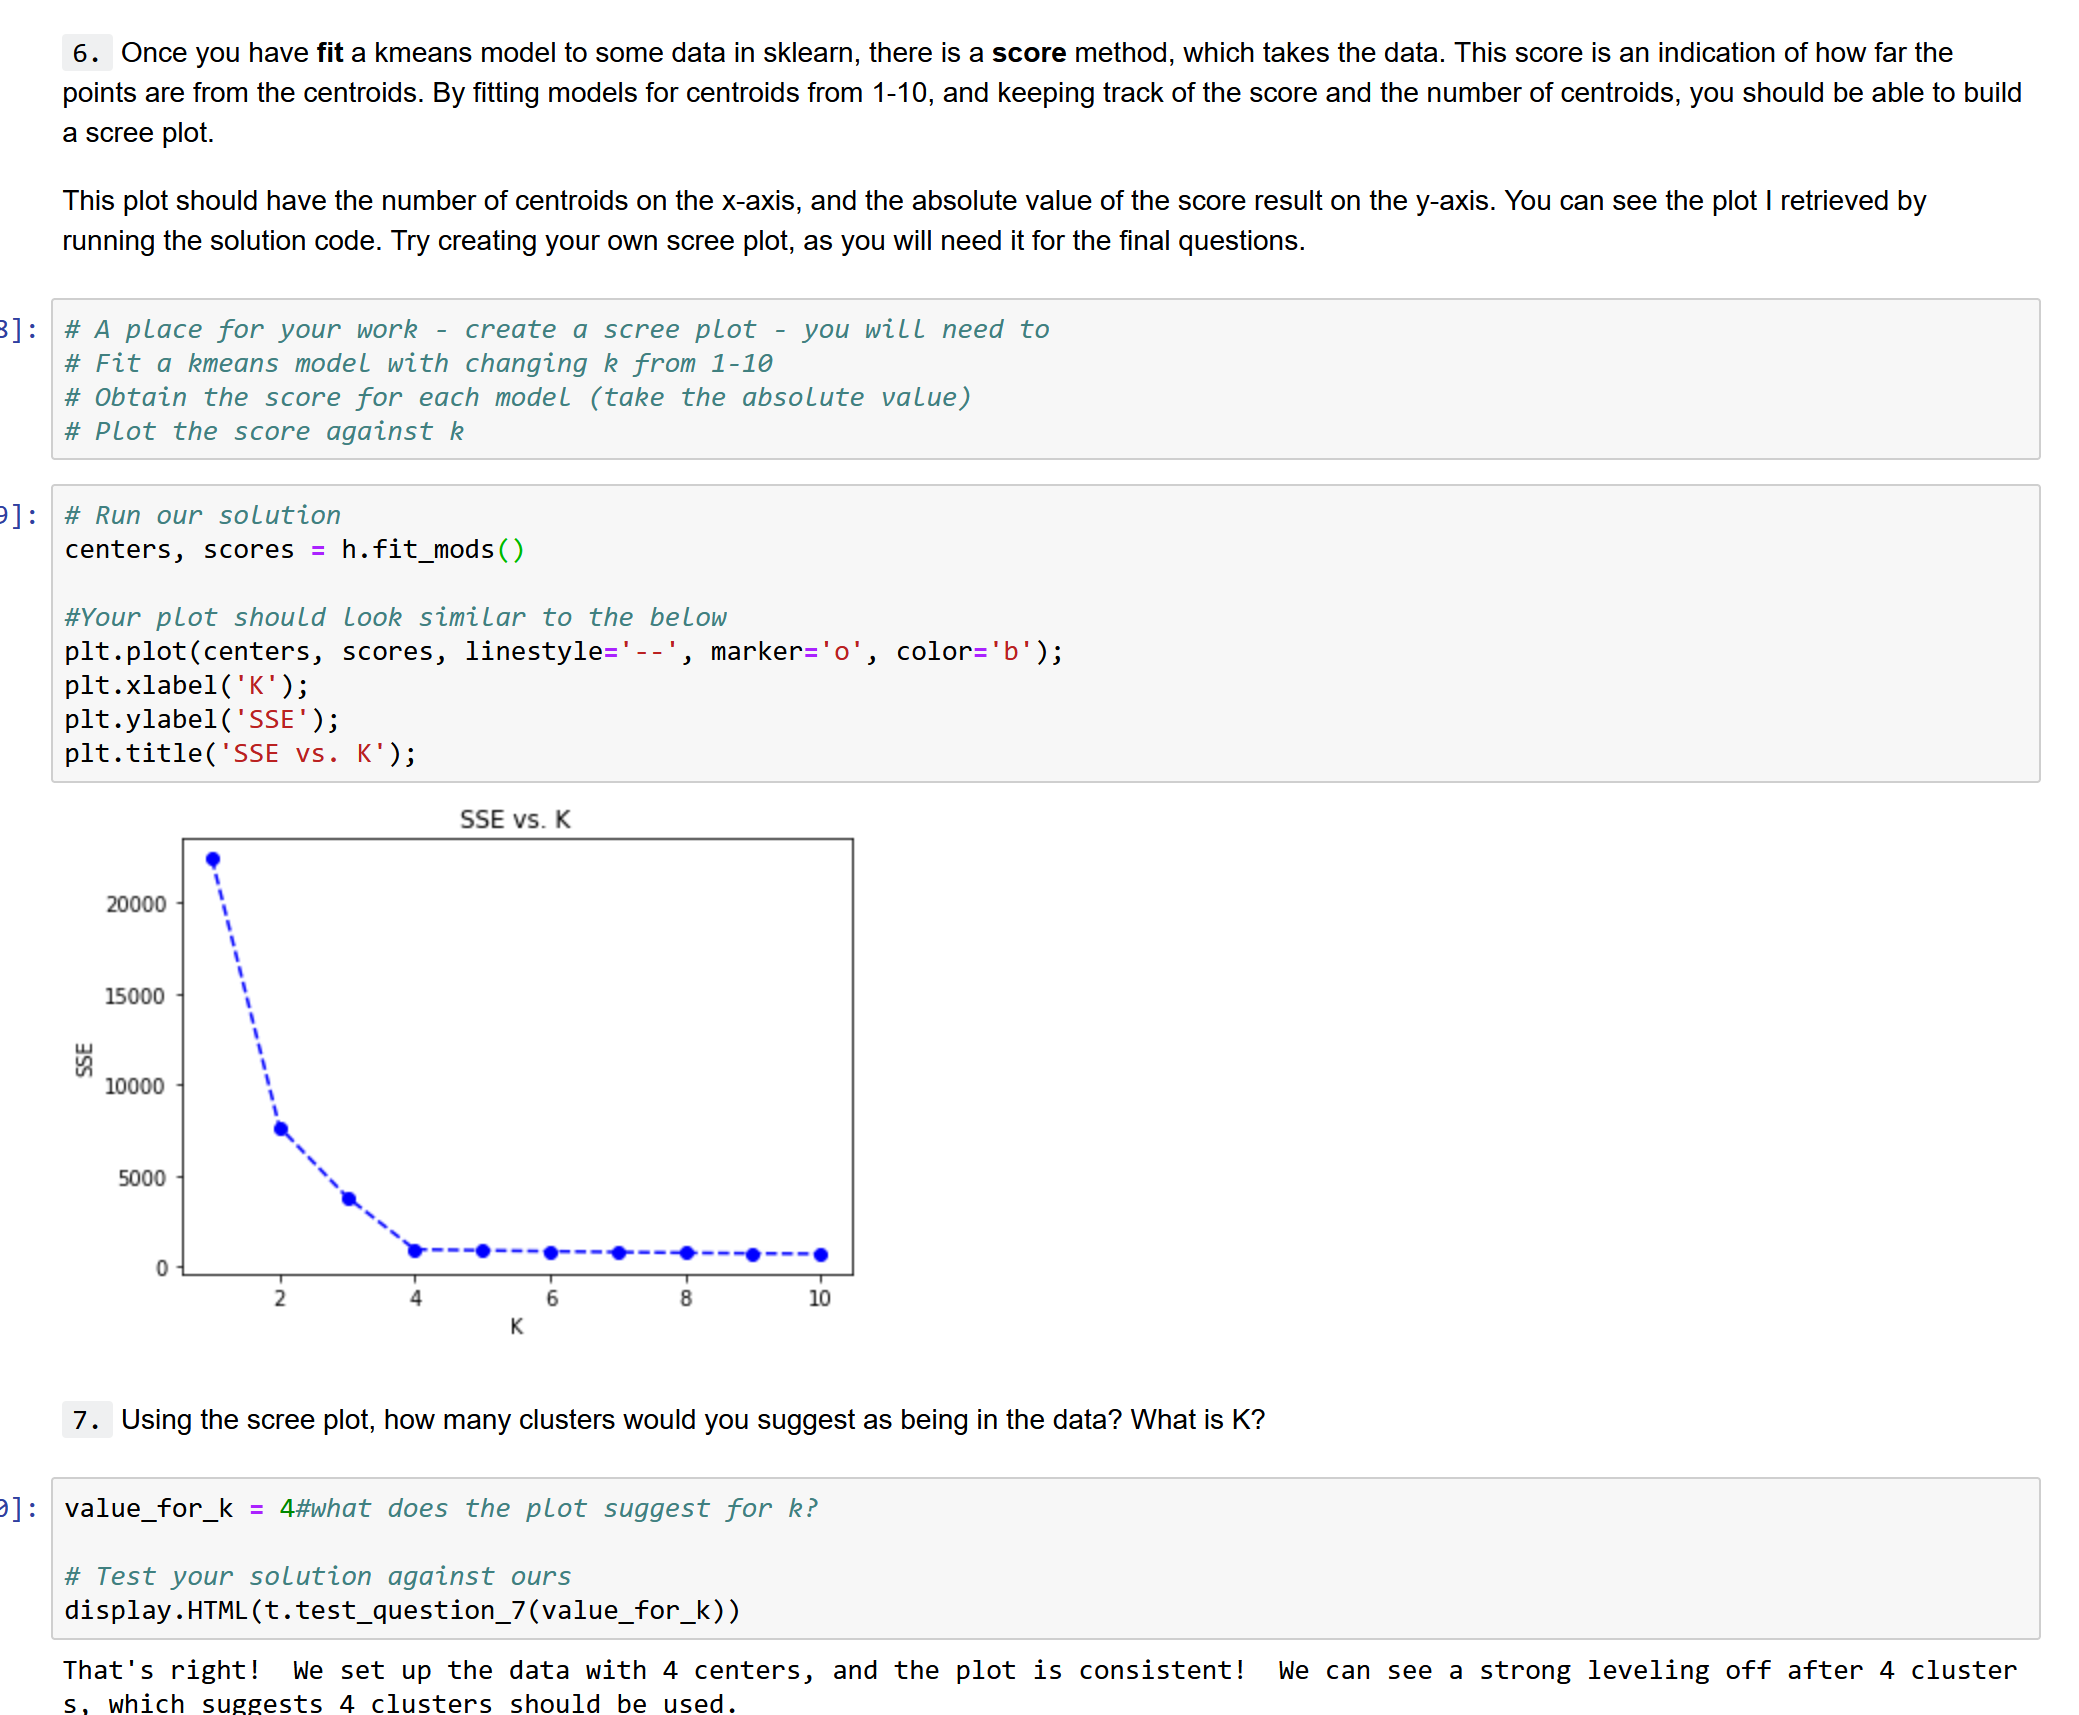

#### How does KMeans work?

1. Randomly place points on a graph of clustered points equal to the number that you are giving for K. These are known as centroids

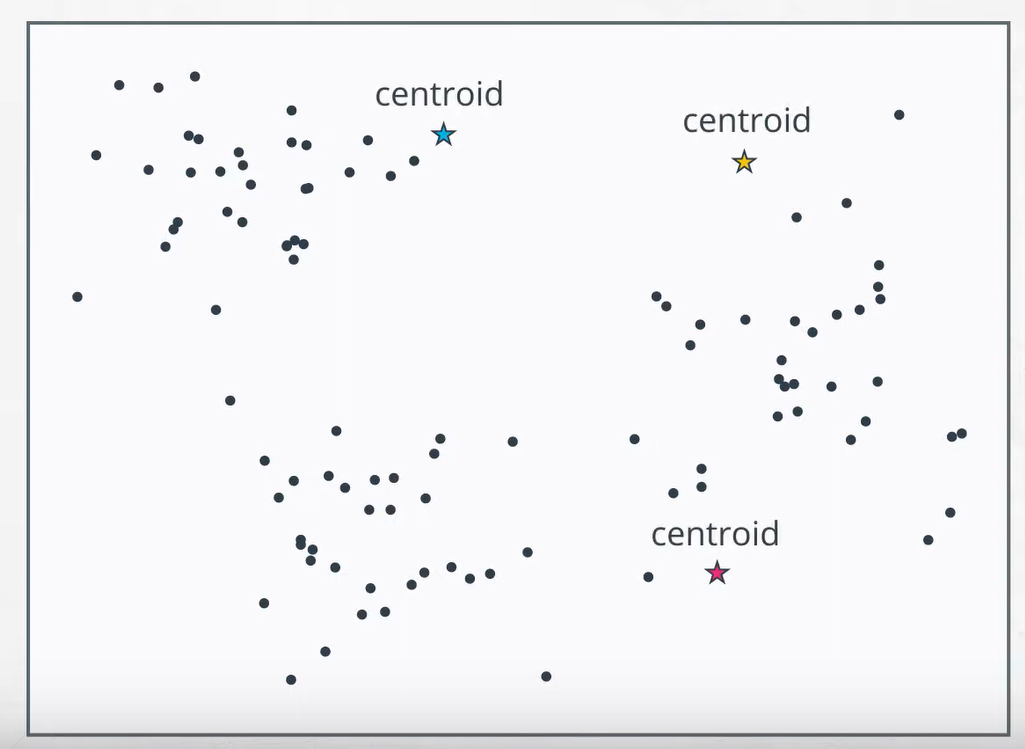

2. Assign the points in the data set to each centroid

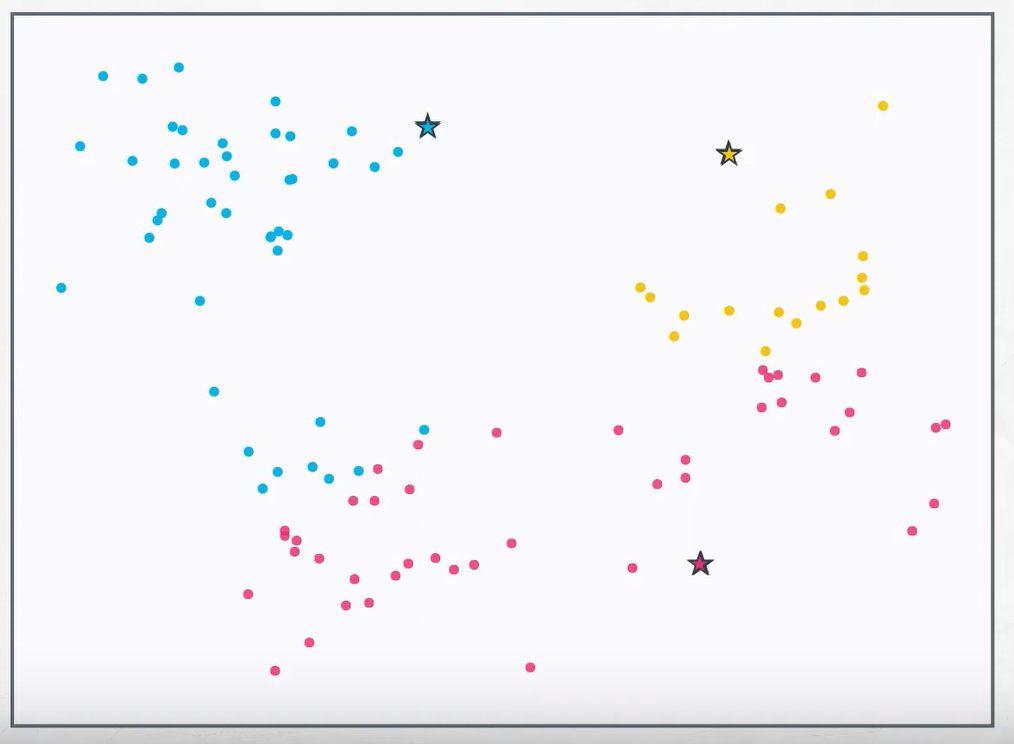

3. Move the centroid to the center of their assigned clusters

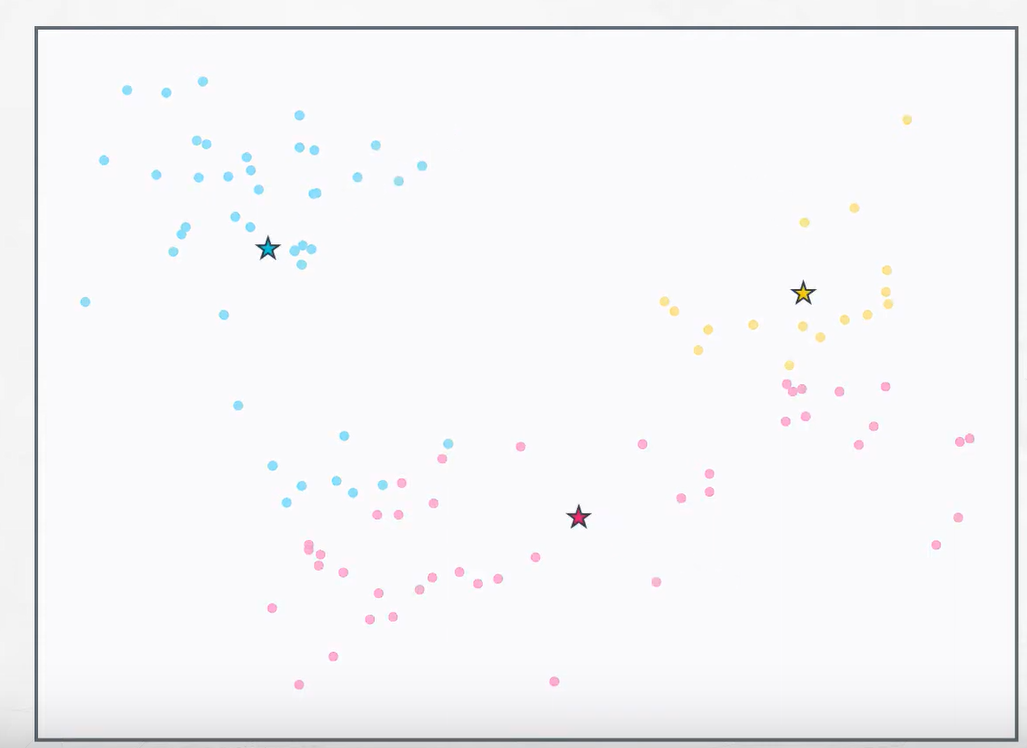

4. Points may now be closer to the centroid of a different group. Re-assign each point to the closest centroid once more.



5. Repeat steps 3 and 4 until centroids will not move. That is the final result!

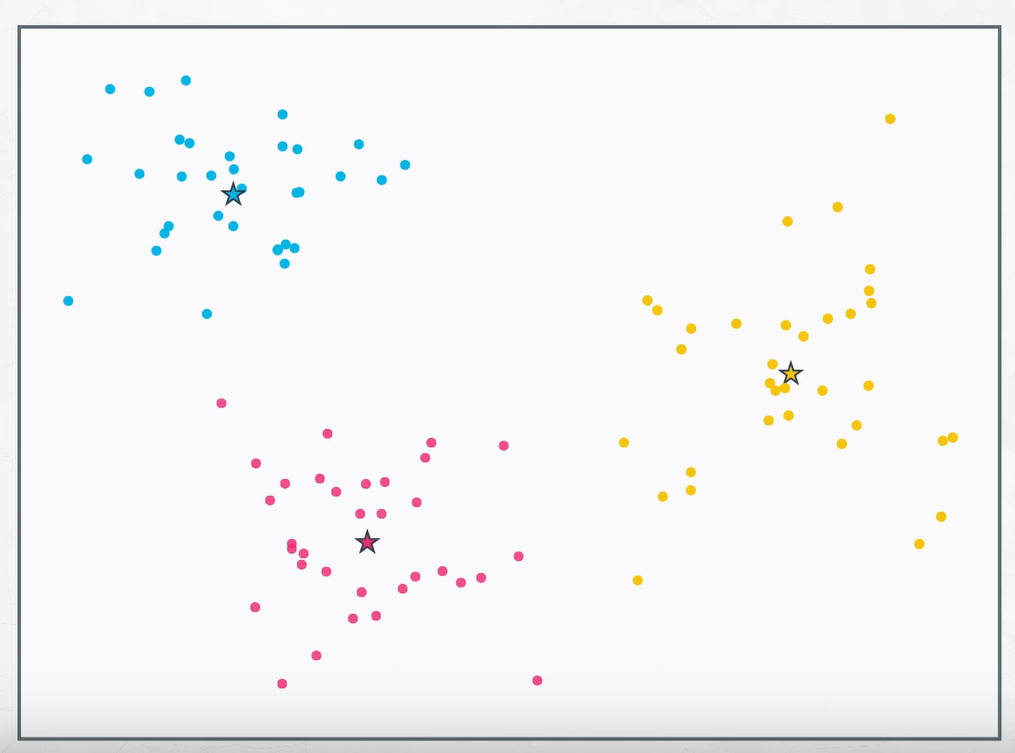





#### Further areas of concern

Can we be sure that final results of the clusters will be the same if the centroid is randomly placed?
- No

Does it matter where we place the centroid?
- Yes

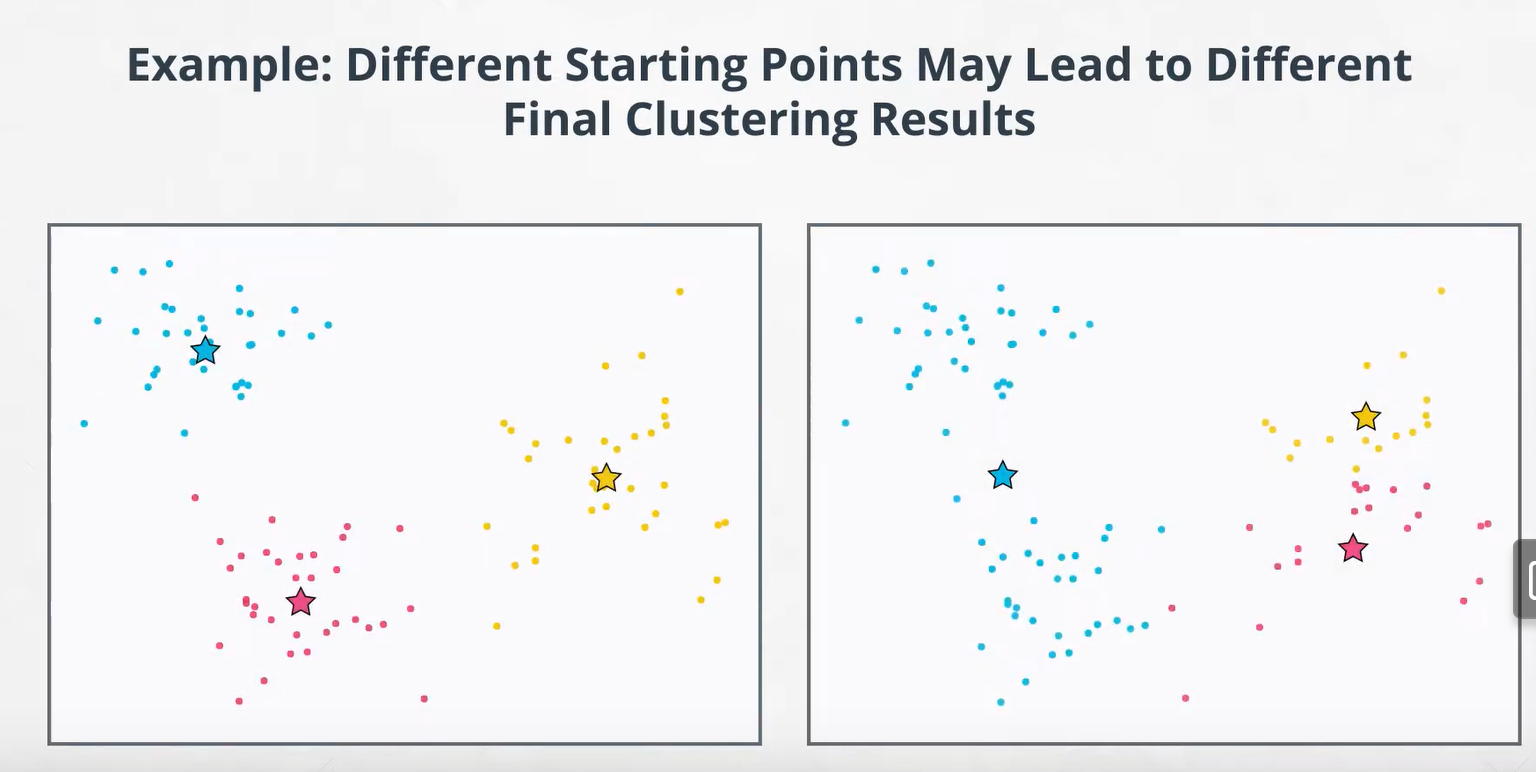

Scikit does this for you, but the best thing to do is to repeatedly run the KMeans alg. 
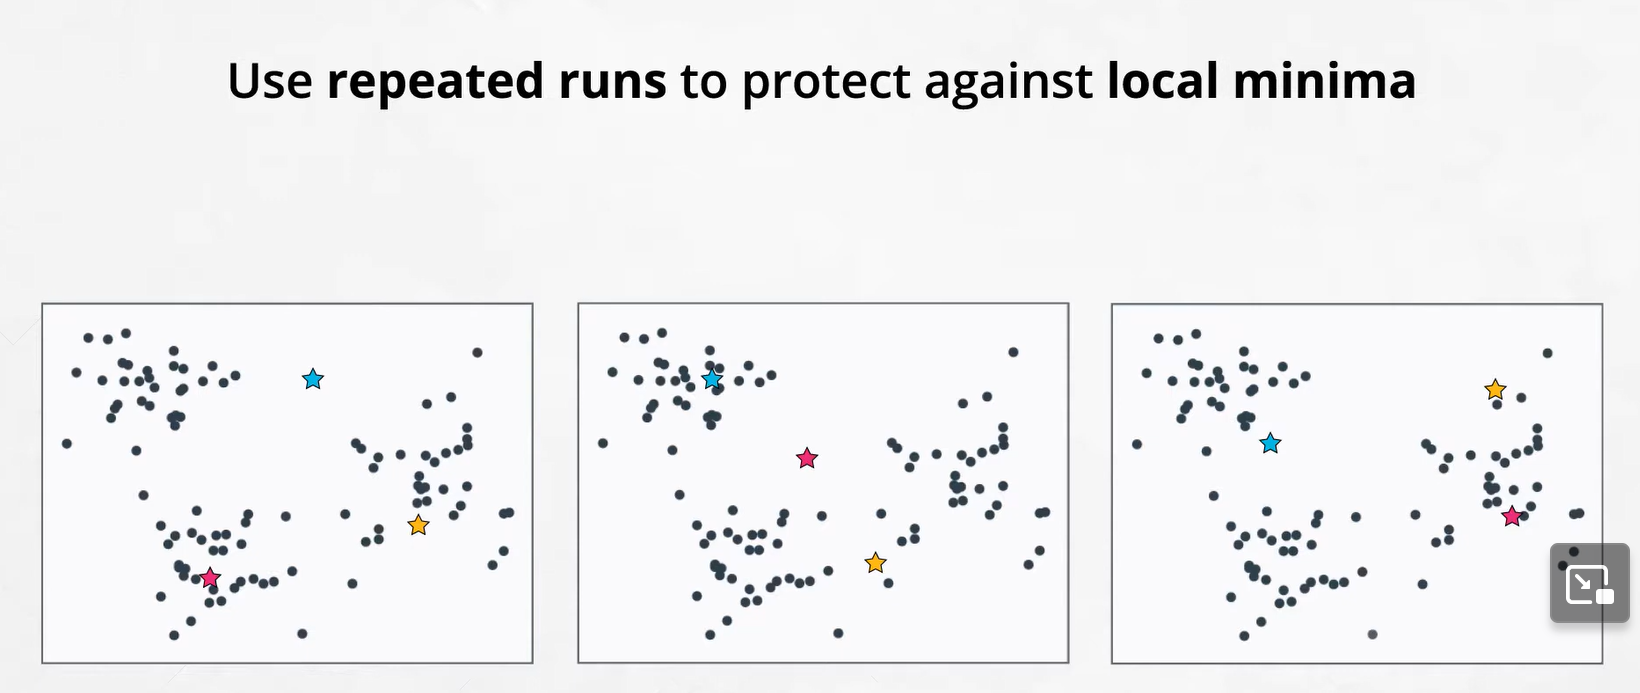

Groupings that differ when we choose different starting points from the multiple trials can be compared against the rest of the runs and each of their average distances between the points and the respective centroids.




### Feature scaling

Necessary for using KMeans.

May choose to either do Standardizing (z-score scaling) or Normalizing (min-max scaling)



Usually we use standardizing with clustering algorithms

We use normalizing when scaling coloring of an image



#### Feature Scaling Example


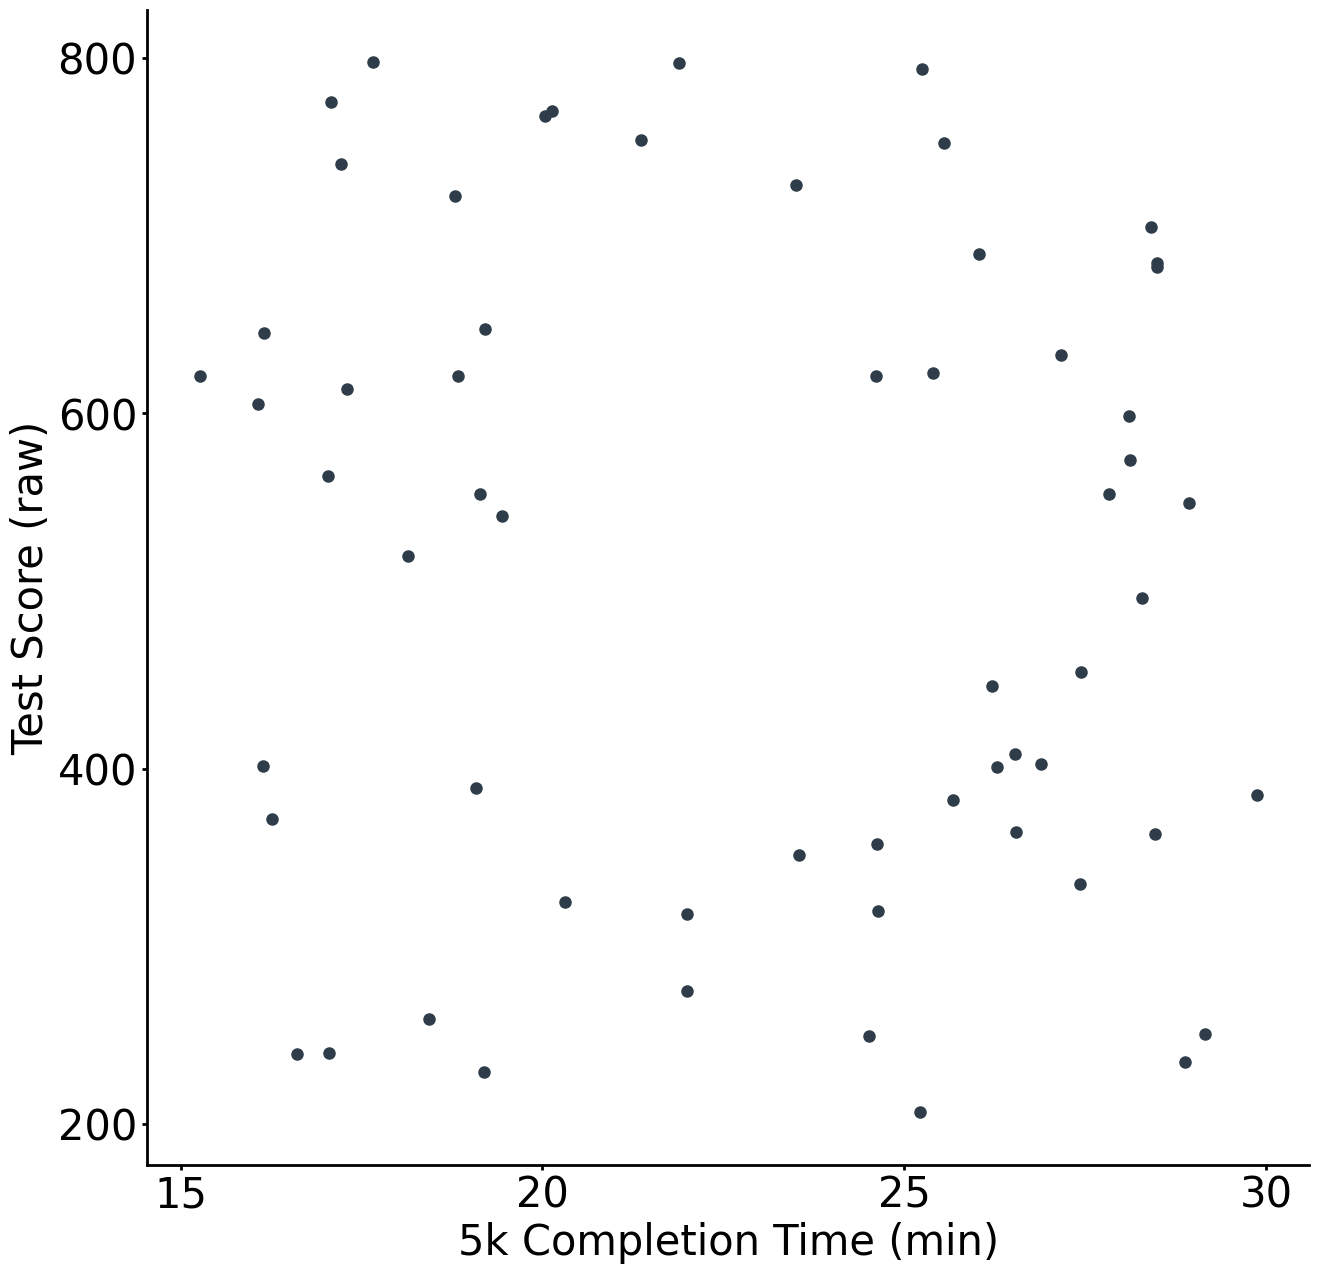

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from IPython.display import Image
from sklearn.datasets import make_blobs


%matplotlib inline

# DSND colors: UBlue, Salmon, Gold, Slate
plot_colors = ['#02b3e4', '#ee2e76', '#ffb613', '#2e3d49']

# Light colors: Blue light, Salmon light
plot_lcolors = ['#88d0f3', '#ed8ca1', '#fdd270']

# Gray/bg colors: Slate Dark, Gray, Silver
plot_grays = ['#1c262f', '#aebfd1', '#fafbfc']


def create_data():
    n_points = 120
    X = np.random.RandomState(3200000).uniform(-3, 3, [n_points, 2])
    X_abs = np.absolute(X)

    inner_ring_flag = np.logical_and(X_abs[:,0] < 1.2, X_abs[:,1] < 1.2)
    outer_ring_flag = X_abs.sum(axis = 1) > 5.3
    keep = np.logical_not(np.logical_or(inner_ring_flag, outer_ring_flag))

    X = X[keep]
    X = X[:60] # only keep first 100
    X1 = np.matmul(X, np.array([[2.5, 0], [0, 100]])) + np.array([22.5, 500])
    
    
    plt.figure(figsize = [15,15])

    plt.scatter(X1[:,0], X1[:,1], s = 64, c = plot_colors[-1])

    plt.xlabel('5k Completion Time (min)', size = 30)
    plt.xticks(np.arange(15, 30+5, 5), fontsize = 30)
    plt.ylabel('Test Score (raw)', size = 30)
    plt.yticks(np.arange(200, 800+200, 200), fontsize = 30)

    ax = plt.gca()
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    [side.set_linewidth(2) for side in ax.spines.values()]
    ax.tick_params(width = 2)
    plt.savefig('C18_FeatScalingEx_01.png', transparent = True)
    
    
    data = pd.DataFrame(X1)
    data.columns = ['5k_Time', 'Raw_Test_Score']
    
    return data

data = create_data()

In [7]:
data.describe()

5k_Time  Raw_Test_Score
count  60.000000       60.000000
mean   22.899027      511.699603
std     4.536244      183.222427
min    15.263902      206.597283
25%    18.820638      361.798208
50%    24.033613      545.795365
75%    26.956643      656.346547
max    29.867819      797.599192

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   5k_Time         60 non-null     float64
 1   Raw_Test_Score  60 non-null     float64
dtypes: float64(2)
memory usage: 1.1 KB


In [9]:
model = KMeans(2) # instantiate a model with two centers
preds = model.fit_predict(data) # fit and predict

In [10]:
# Run this to see your results

def plot_clusters(data, preds, n_clusters):
    plt.figure(figsize = [15,15])

    for k, col in zip(range(n_clusters), plot_colors[:n_clusters]):
        my_members = (preds == k)
        plt.scatter(data['5k_Time'][my_members], data['Raw_Test_Score'][my_members], s = 64, c = col)

    plt.xlabel('5k Completion Time (min)', size = 30)
    plt.xticks(np.arange(15, 30+5, 5), fontsize = 30)
    plt.ylabel('Test Score (raw)', size = 30)
    plt.yticks(np.arange(200, 800+200, 200), fontsize = 30)

    ax = plt.gca()
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    [side.set_linewidth(2) for side in ax.spines.values()]
    ax.tick_params(width = 2)
    
plot_clusters(data, preds, 2)

Now lets standardize our results

In [17]:
data['test_scaled'] = (data['Raw_Test_Score'] - data['Raw_Test_Score'].mean()) / data['Raw_Test_Score'].std() # standardized test scores
data['5k_time_sec'] = data['5k_Time'] * 60 # times in seconds

In [20]:
model = KMeans(2) # instantiate a model with two centers
preds = model.fit_predict(data) # fit and predict

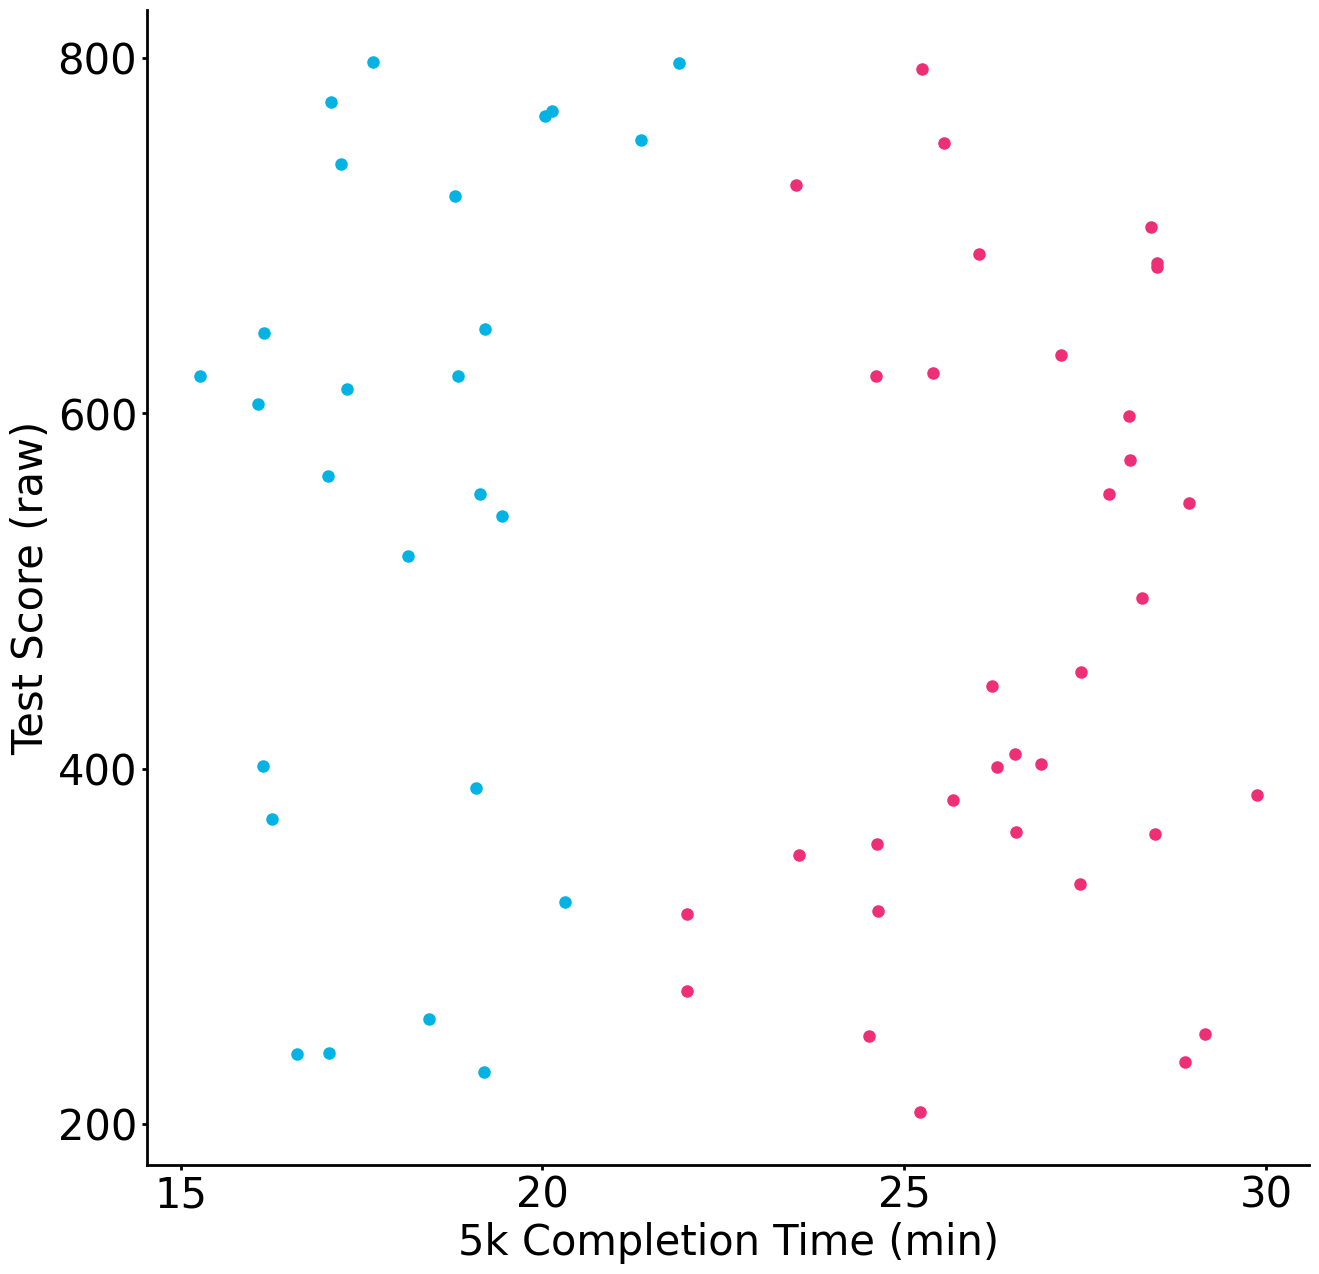

In [21]:
plot_clusters(data, preds, 2)

In [22]:
# options
a = 'We should always use normalizing'
b = 'We should always scale our variables between 0 and 1.'
c = 'Variable scale will frequently influence your results, so it is important to standardize for all of these algorithms.'
d = 'Scaling will not change the results of your output.'

best_option = c# best answer variable here

Below are some pictures that show another way to scale using the sklearn preprocessing module to do some standard and min-max scaling.



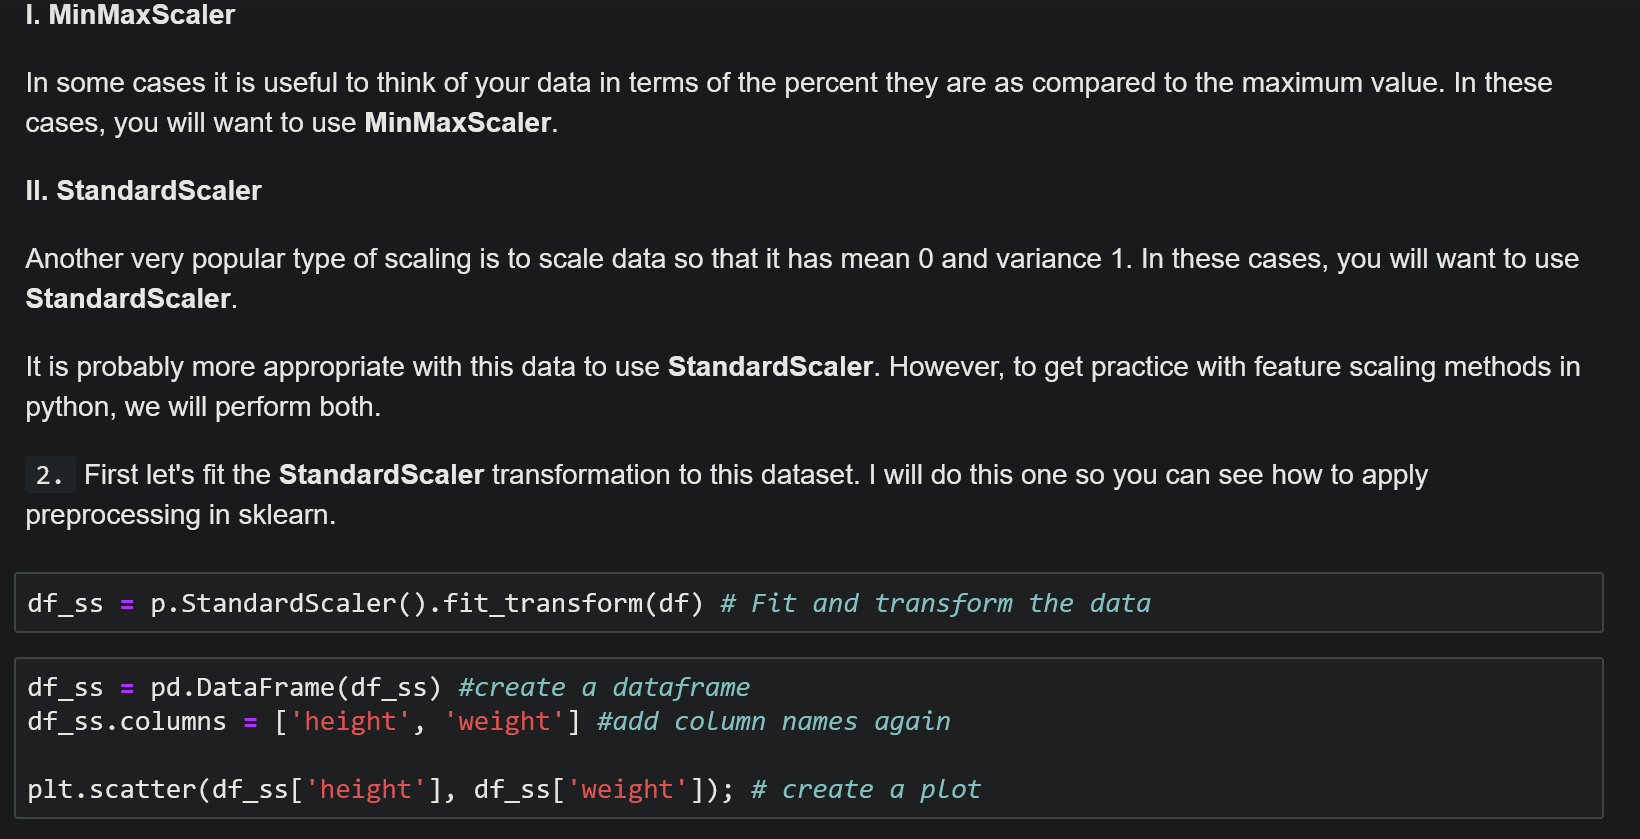

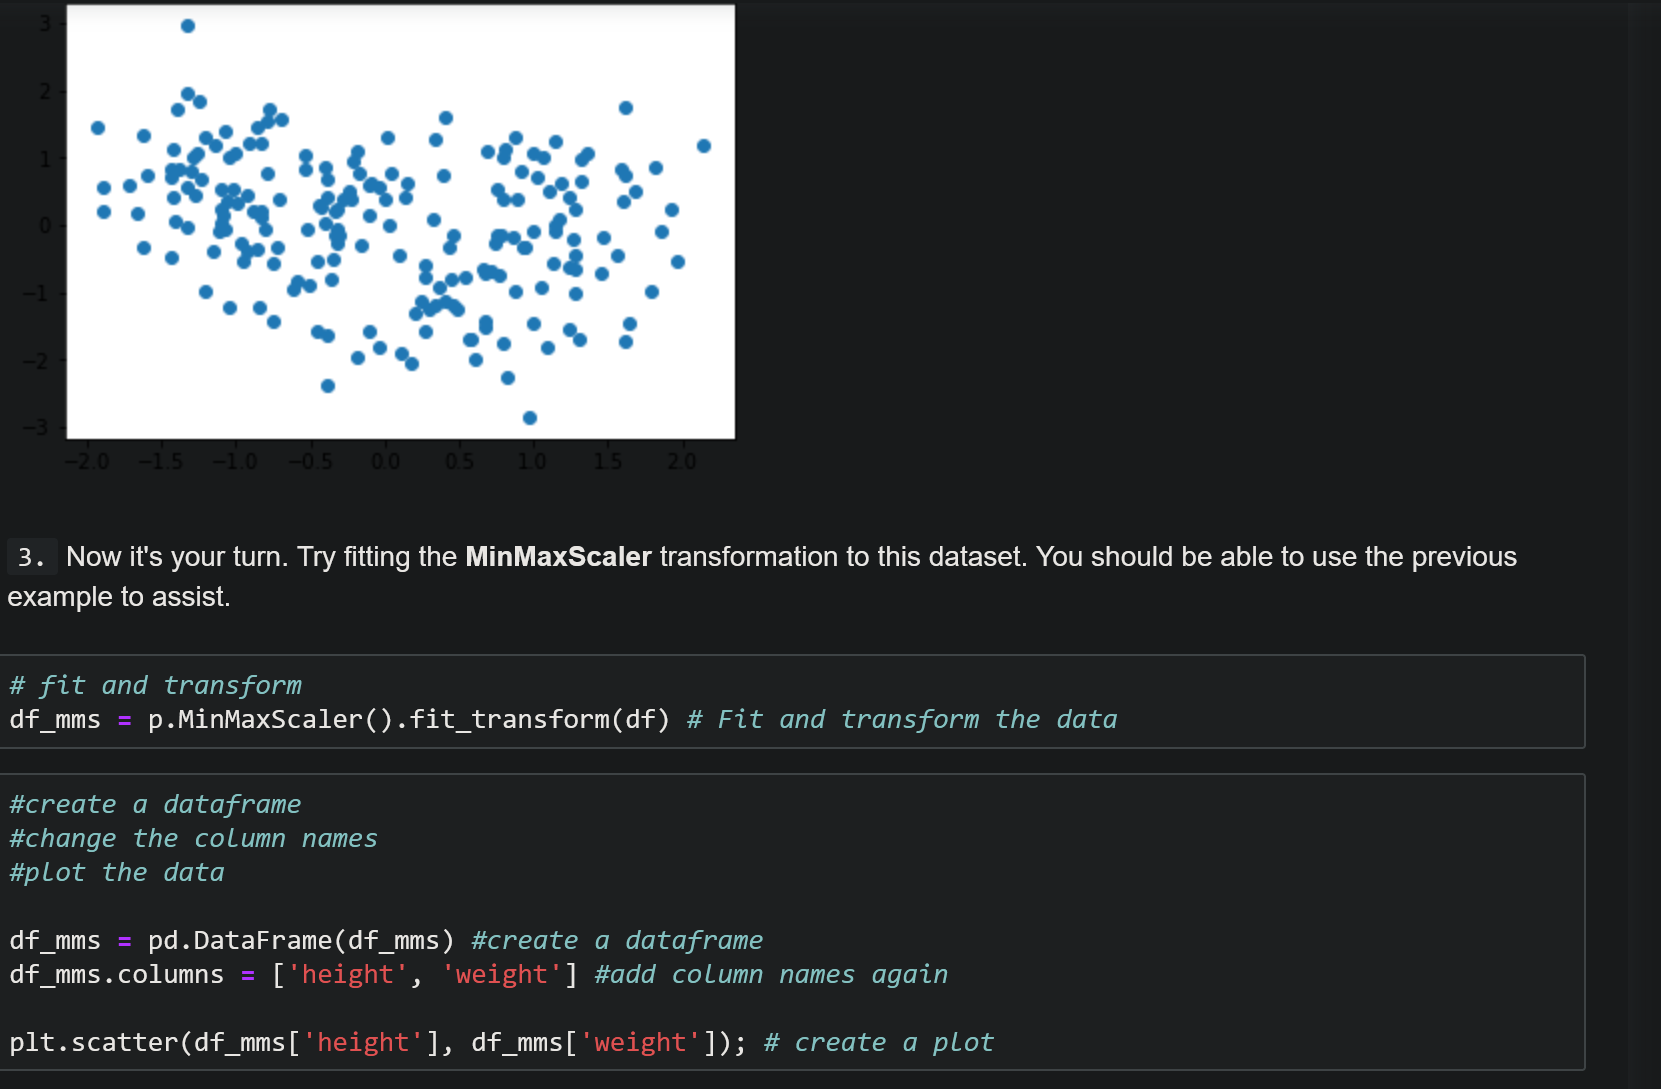

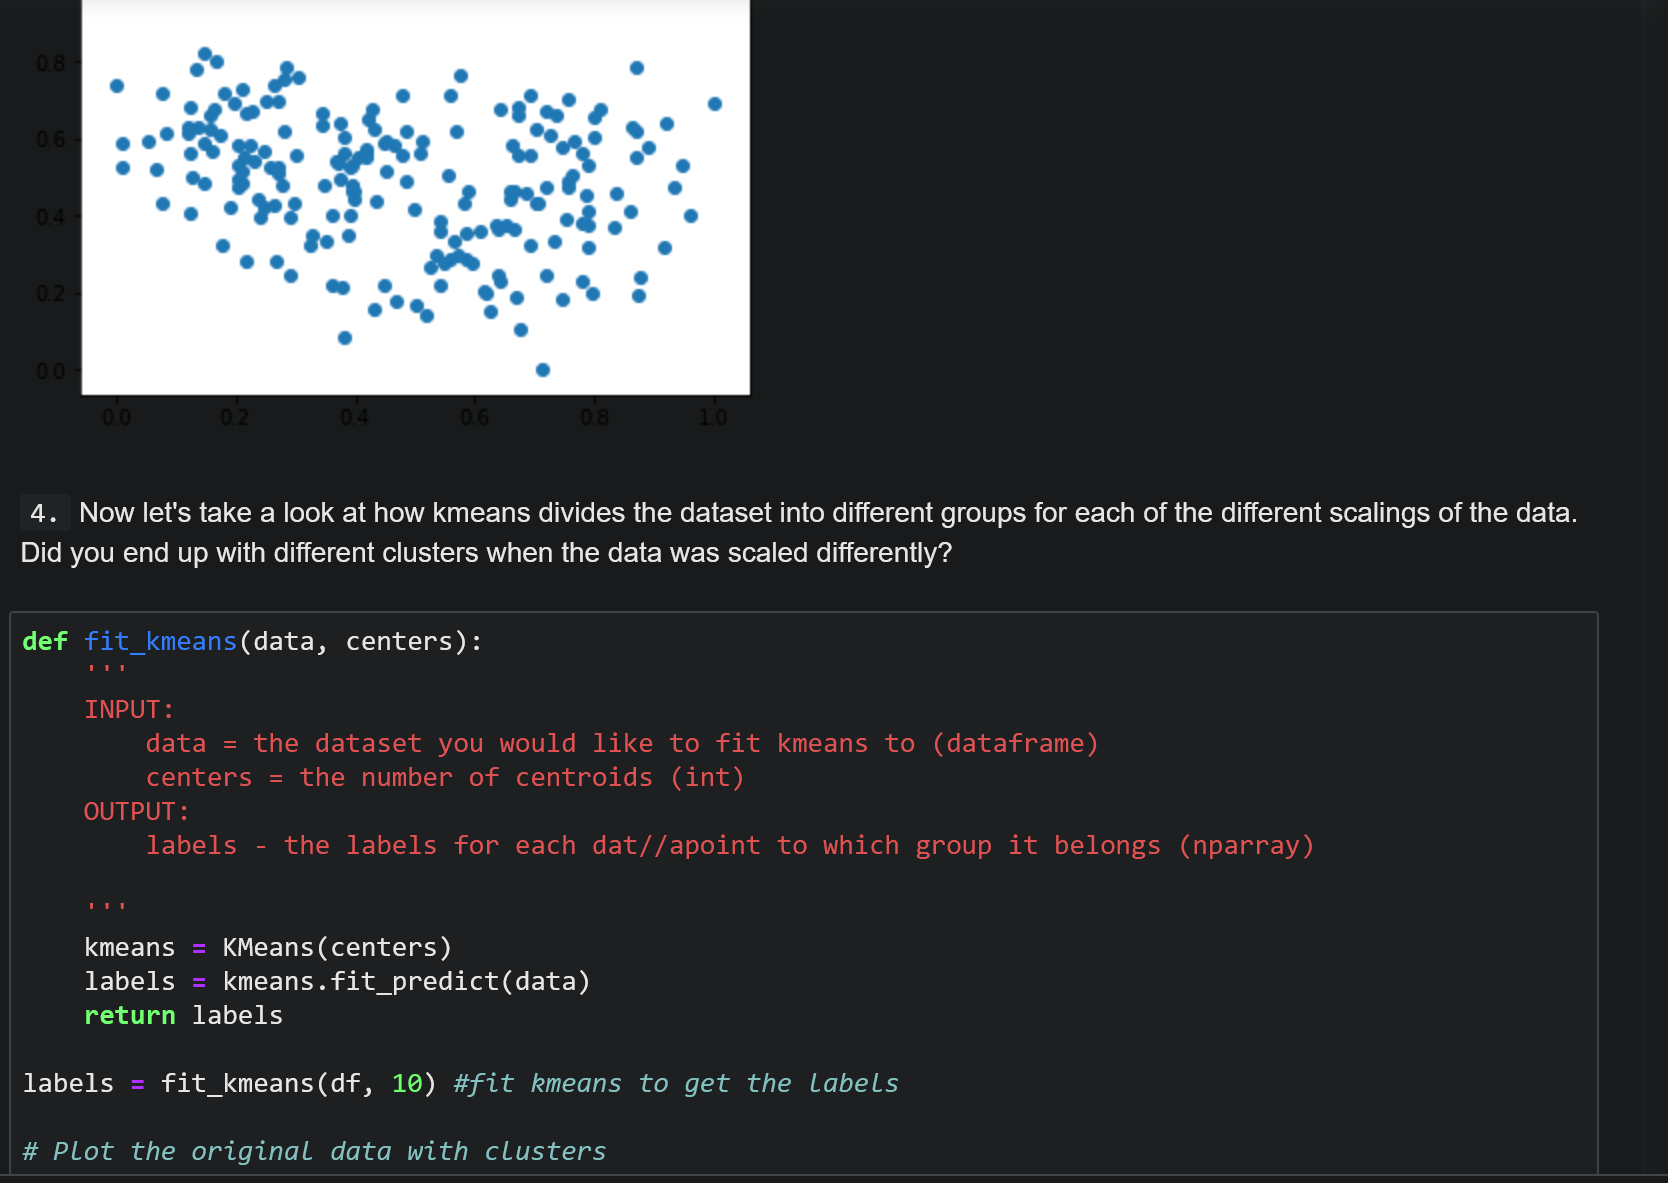

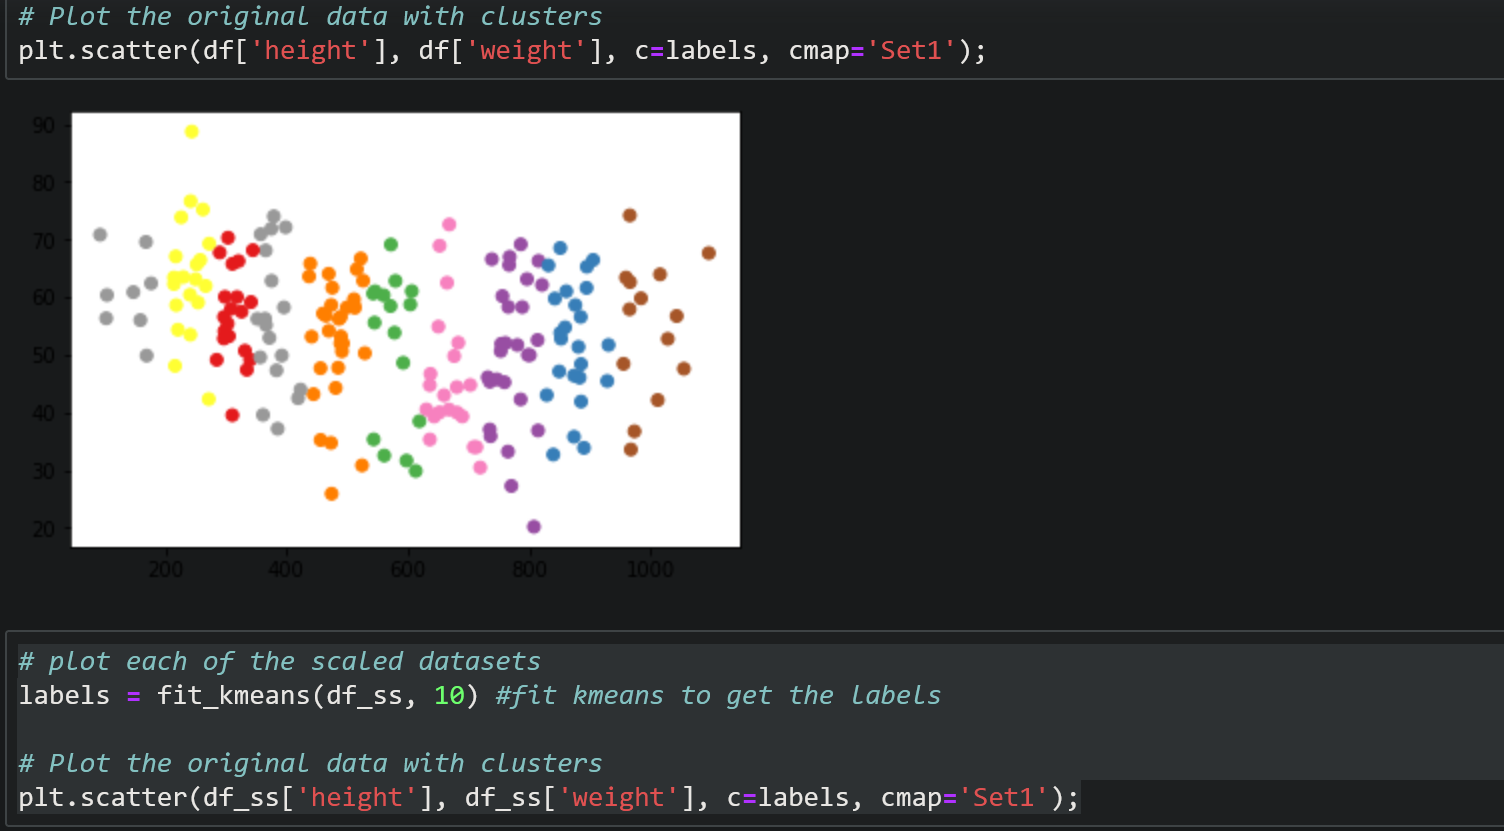

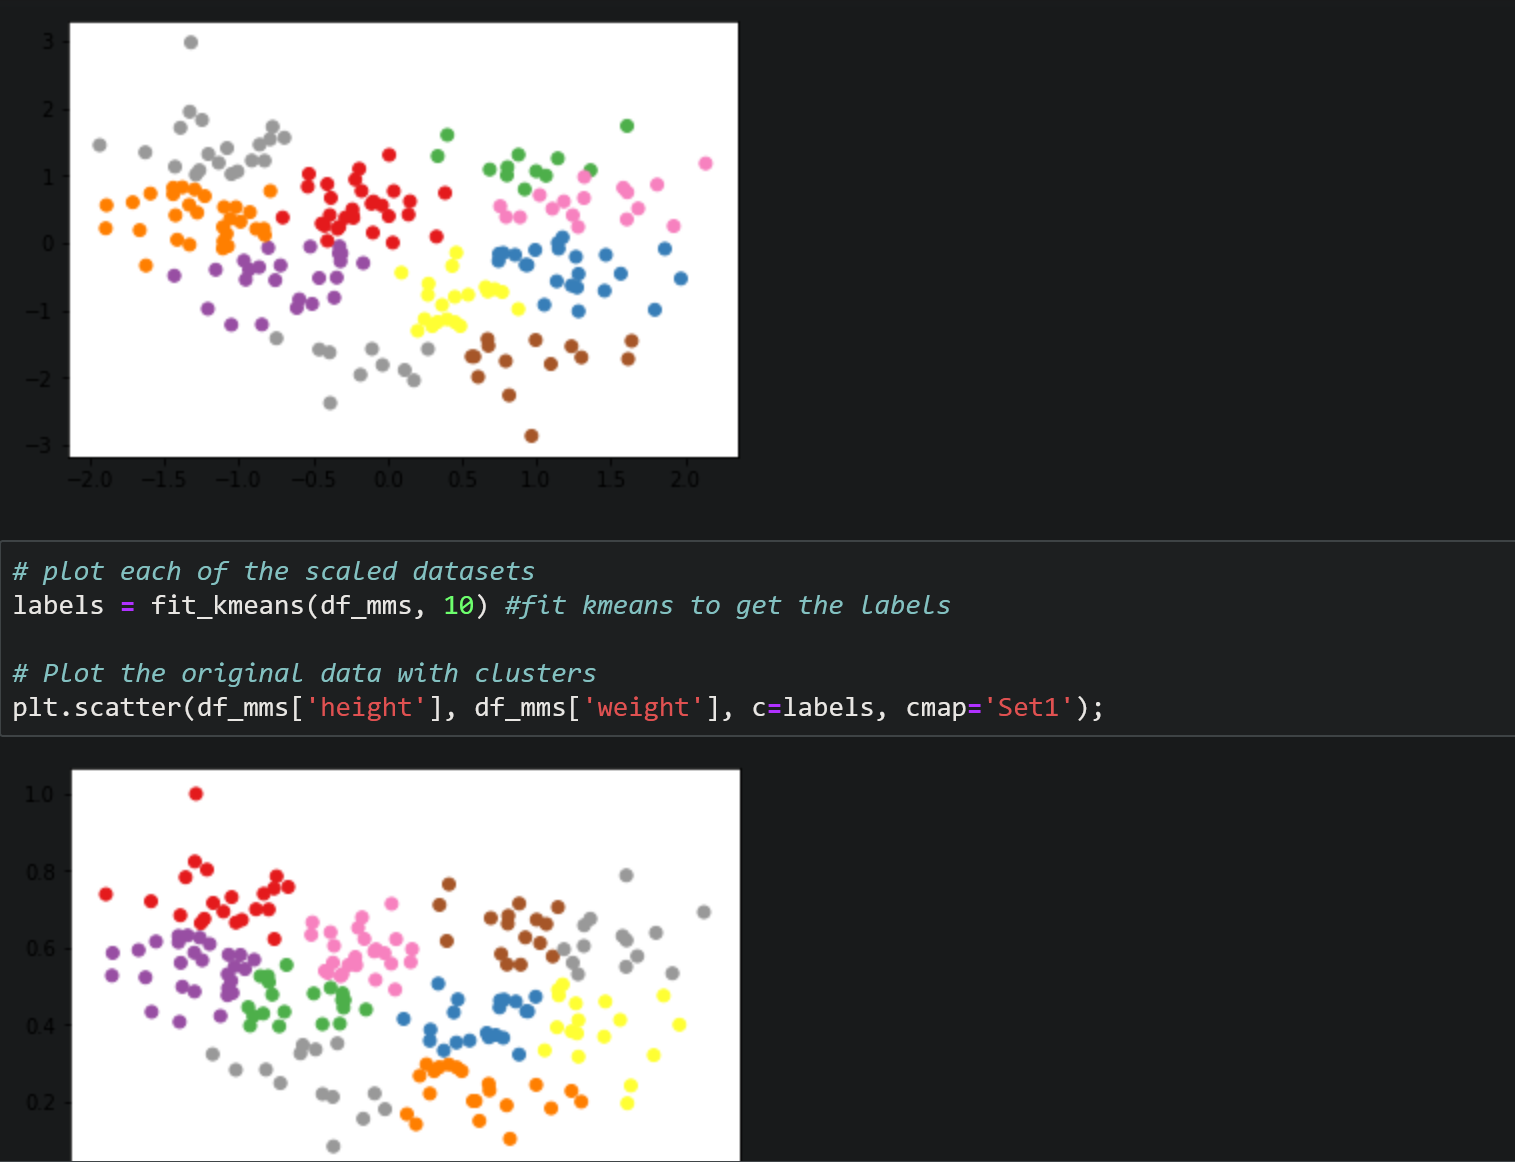

## Dimensionality Reduction

Essentially reducing the number of variables used.

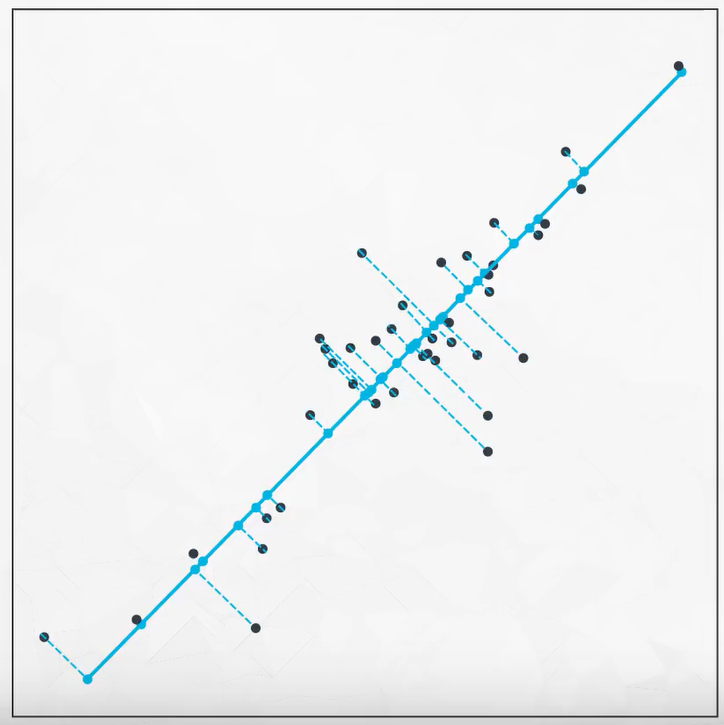

